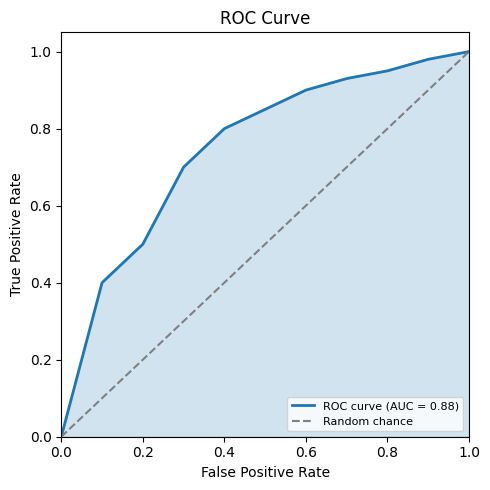

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def plot_roc_curve(fpr, tpr, auc):
    """
    Plot ROC curve with improved aesthetics and transparent area under the curve.

    Args:
        fpr (list): List of false positive rates.
        tpr (list): List of true positive rates.
        auc (float): Area under the ROC curve.
    """
    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr, color='#1f77b4', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc))
    plt.fill_between(fpr, tpr, color='#1f77b4', alpha=0.2)  # Transparent fill under the curve
    plt.plot([0, 1], [0, 1], color='gray', lw=1.5, linestyle='--', label='Random chance')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=10)
    plt.ylabel('True Positive Rate', fontsize=10)
    plt.title('ROC Curve')
    plt.legend(loc="lower right", fontsize=8)
    plt.tight_layout()
    plt.show()

# Sample data
fpr = np.array([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
tpr = np.array([0.0, 0.4, 0.5, 0.7, 0.8, 0.85, 0.9, 0.93, 0.95, 0.98, 1.0])
auc = 0.88

# Plotting the ROC curve
plot_roc_curve(fpr, tpr, auc)


In [2]:
from ML.figure import plot_roc_for_disease_pairs
plot_roc_for_disease_pairs('data/paras.txt', '../')

...Generating feature roc plots...


In [4]:
filename = "examplep.pdb"
# Remove the .pdb suffix
filename_without_suffix = filename.removesuffix('.pdb')
print(filename_without_suffix)

examplep


In [2]:
category = ['c', 'c', 'c', 'd', 'd', 'd', 'd', 'e', 'e', 'e', 'f', 'f', 'f', 'g', 'g']
set_category = list(set(category))
print(set_category)

['d', 'f', 'e', 'g', 'c']


In [3]:
category = ['c', 'c', 'c', 'd', 'd', 'd', 'd', 'e', 'e', 'e', 'f', 'f', 'f', 'g', 'g']
set_category = list(dict.fromkeys(category))
print(set_category)

['c', 'd', 'e', 'f', 'g']


/Users/wangjingran/anaconda3/envs/PTEN/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


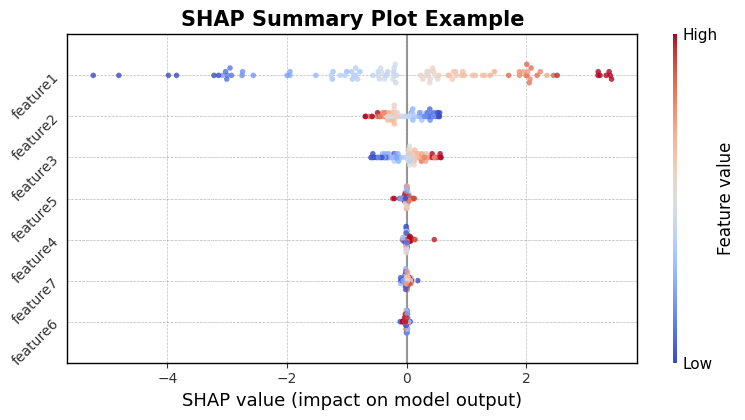

In [1]:
import shap
import matplotlib.pyplot as plt
import xgboost
import numpy as np
import pandas as pd

# 创建示例数据
np.random.seed(42)
X = pd.DataFrame({
    'feature1': np.random.randn(100),
    'feature2': np.random.randn(100) * 0.5,
    'feature3': np.random.randn(100) + 1,
    'feature4': np.random.rand(100) * 10,
    'feature5': np.random.rand(100) * 10,
    'feature6': np.random.rand(100) * 10,
    'feature7': np.random.rand(100) * 10
})
y = X['feature1'] * 2 - X['feature2'] + X['feature3'] * 0.5 + np.random.randn(100) * 0.1

# 训练示例模型
model = xgboost.XGBRegressor()
model.fit(X, y)

# 计算 SHAP 值
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

# 绘制改进后的 SHAP summary plot
name = "SHAP Summary Plot Example"

fig = shap.summary_plot(
    shap_values, 
    X, 
    alpha=0.8, 
    show=False, 
    cmap='coolwarm'  # 使用 coolwarm 配色
)

# 美化图表
plt.title(f"{name}",fontweight='bold', fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10,  rotation=45, ha='right')  # 标签旋转60度，右对齐
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)
# 添加矩形框线
ax = plt.gca()  # 获取当前轴对象
ax.tick_params(axis='y', pad=-16)  # 减少标签与轴线的间距（pad 值越小越靠近）
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_color('black')  # 设置框线颜色
    spine.set_linewidth(1)  # 设置框线宽度
plt.tight_layout()
plt.show()
